In [36]:
import numpy as np
import pandas as pd


def load_metadata(filename):
    #DATA_URL = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Promo Tracker\\Promo_Old_c.csv"
    #df = pd.read_csv(DATA_URL, delimiter = ";", index_col="Promo_ID")   #check for delimiter in csv or other file format adjust accordingly
    #PATH = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Forecasting\\"
    # f_2018 = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Forecasting\\Data for forecasting - 2018.csv"  
    df = pd.read_csv(filename, header = 0, skiprows = 2, index_col=0, parse_dates = True)   #check for delimiter in csv or other file format adjust accordingly
    df.columns = df.columns.str.strip()
    return df
    #return df.set_index("Promo ID")

PATH = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Forecasting\\"
filenames = ['Data for forecasting - 2018.csv','Data for forecasting - 2019.csv','Data for forecasting - 2020.csv']
data_df = pd.DataFrame()
for f in filenames:
    full_file = PATH+f
    df_i = load_metadata(full_file)
    data_df = pd.concat([data_df,df_i])

In [37]:
#FILTER NEGATIVE AMOUNTS 
#filt = (data_df["Net Units Sold"]<0) & (data_df["Gross Units Sold"]>0)
filt = (data_df["Gross Sales (USD)">=0) #only poisitve USD Sales >=0
new_releases = ("Dakar","Pathfinder: Kingmaker","Illusion","Outward","Metro Exodus","Windbound","Relicta","Gods Will Fall","Shenmue","Iron Harvest")
#new_releases = ["King's Bountry"]
lower_case = [string.lower() for string in new_releases]
df_new_releases = data_df[data_df.Game.str.lower().str.strip().isin(lower_case)&~filt]
df = data_df[~data_df.Game.isin(new_releases)&~filt]
df_new_releases

,Bundle(ID#),Bundle Name,Product(ID#),Product Name,Type,Game,Platform,Country Code,Country,Region,...,Chargeback/Returns,Net Units Sold,Base Price,Sale Price,Currency,Gross Steam Sales (USD),Chargeback/Returns (USD),VAT/Tax (USD),Net Steam Sales (USD),Tag
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,-1,Direct Package Sale,240858,Outward for Beta Testing (retail),Retail,Outward,Windows,FR,France,Western Europe,...,0,1,0.00,0.00,USD,0.0000,0.0,0.0000,0.0000,Testing
2018-03-30,-1,Direct Package Sale,177765,Pathfinder: Kingmaker Developer Comp (retail),Retail,Pathfinder: Kingmaker,Windows,RU,Russian Federation,Russia Ukraine & CIS,...,0,1,0.00,0.00,USD,0.0000,0.0,0.0000,0.0000,Kickstarter
2018-03-31,-1,Direct Package Sale,177765,Pathfinder: Kingmaker Developer Comp (retail),Retail,Pathfinder: Kingmaker,Mac,RU,Russian Federation,Russia Ukraine & CIS,...,0,1,0.00,0.00,USD,0.0000,0.0,0.0000,0.0000,Kickstarter
2018-05-04,-1,Direct Package Sale,177766,Pathfinder: Kingmaker for Beta Testing (retail),Retail,Pathfinder: Kingmaker,Windows,AT,Austria,Western Europe,...,0,4,0.00,0.00,USD,0.0000,0.0,0.0000,0.0000,Kickstarter
2018-05-04,-1,Direct Package Sale,177766,Pathfinder: Kingmaker for Beta Testing (retail),Retail,Pathfinder: Kingmaker,Windows,AU,Australia,Oceania,...,0,7,0.00,0.00,USD,0.0000,0.0,0.0000,0.0000,Kickstarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,15369,Outward : The Adventurer Bundle,354036,Outward,Steam,Outward,Windows,VN,Viet Nam,South East Asia,...,0,1,579000.00,156000.00,VND,6.7508,0.0,0.0000,6.7508,NaN
2020-12-31,15369,Outward : The Adventurer Bundle,354036,Outward,Steam,Outward,Windows,ZA,South Africa,Africa,...,0,3,629.00,169.83,ZAR,34.6800,0.0,-4.5231,30.1569,NaN
2020-12-31,15369,Outward : The Adventurer Bundle,354036,Outward,Steam,Outward,Mac,US,United States,North America,...,0,1,39.99,10.79,USD,10.7900,0.0,0.0000,10.7900,NaN


Text(0.5, 1.0, 'Sales of new releases in Steam')

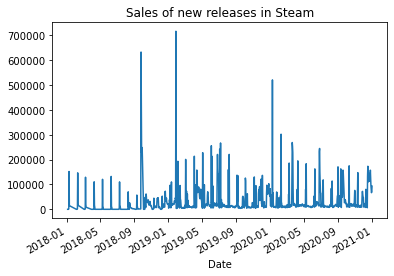

In [40]:
from matplotlib import pyplot as plt
#Add "Discount anti-rate" (share of original price)
#df_new_releases["Discount"] = df["Sale Price"]/df["Base Price"]

#CREATING PLOTS
#fig, axes = plt.subplots(nrows = 4, ncols = 2,)
#taking Numerical values for groupby
all_values = ["Gross Steam Sales (USD)","Net Steam Sales (USD)",'Net Units Sold','Base Price','Sale Price']#, 'Discount']
grouped_new_releases = df_new_releases[all_values].groupby(["Date"]).sum()
grouped_new_releases
ax_new_releases = grouped_new_releases[all_values[0]].plot()
ax_new_releases.set_title("Sales of new releases in Steam")
#ax_new_releases.axvline(pd.to_datetime('2019-07-01'),color="red",linestyle = "--")



     Gross Steam Sales (USD) in Ths
242                    13454.208511
238                    12136.981646
233                     4732.056685
271                     4543.910889
291                     3468.680129
80                      2796.513214
201                     2393.452936
482                     2065.967143
250                     1989.337484
525                     1619.863114


Text(0.5, 1.0, 'Top 10 performers in Steam in 2018-2020')

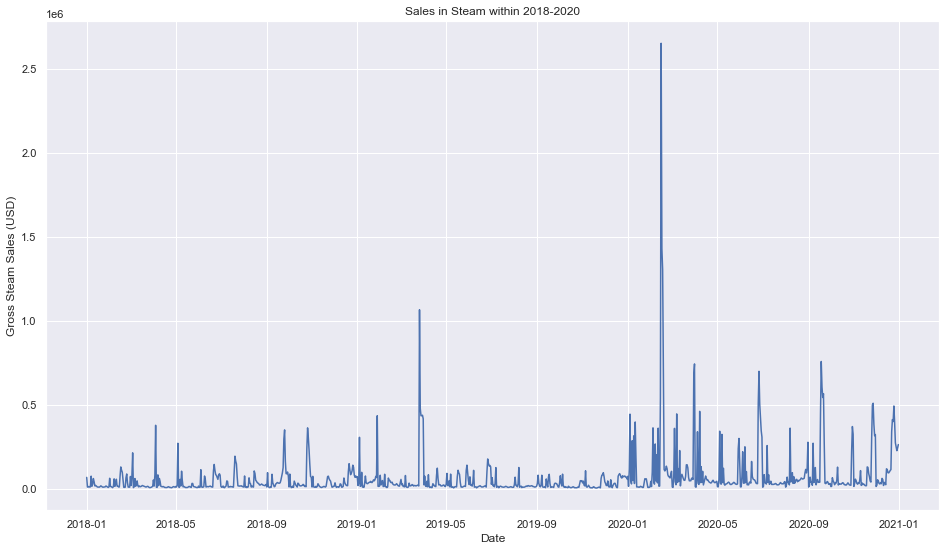

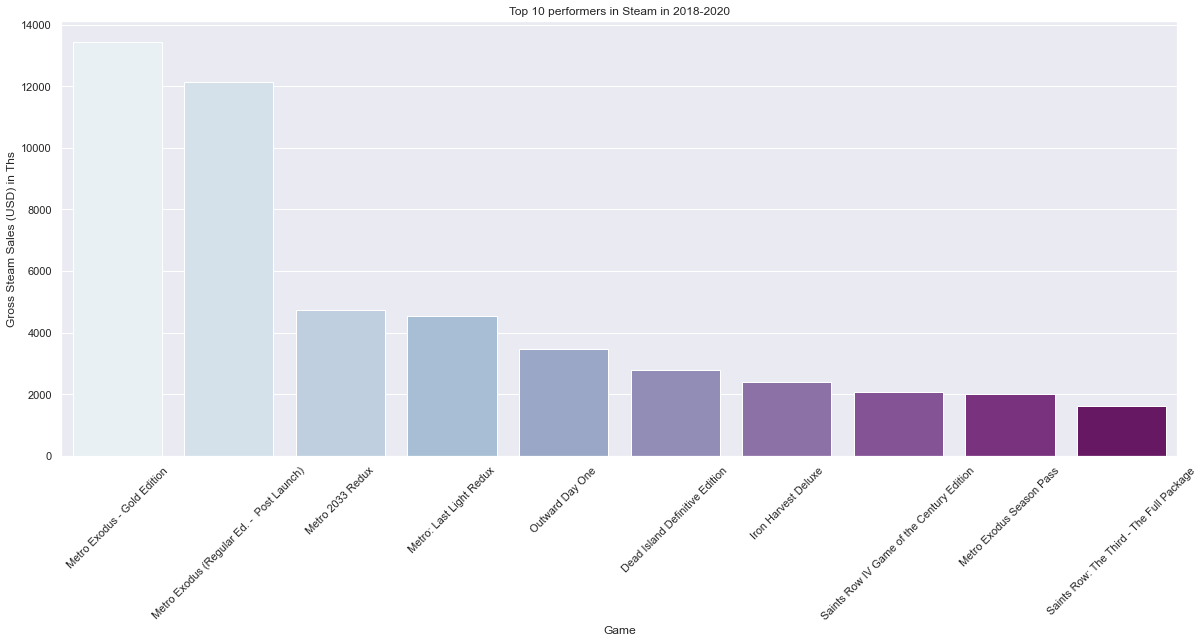

In [42]:
import seaborn as sns
sns.set()
plt.figure(figsize = (16,9))

s = sns.lineplot(x= df.groupby(df.index).sum().index, 
             y = df.groupby(df.index).sum()["Gross Steam Sales (USD)"])

s.set_title("Sales in Steam within 2018-2020")

game_revenue=df[["Game", "Gross Steam Sales (USD)"]].groupby(["Game"], as_index=False).sum().sort_values(by="Gross Steam Sales (USD)", ascending=False)
plt.figure(figsize=(20,8))
game_revenue["Gross Steam Sales (USD) in Ths"]=game_revenue["Gross Steam Sales (USD)"]/1000
# plt.xlabel(rotation = 90)
# sns.distplot(df['Quantity'])
top10=game_revenue.nlargest(10,"Gross Steam Sales (USD)")
print(top10[["Gross Steam Sales (USD) in Ths"]])
g = sns.barplot(x="Game", y="Gross Steam Sales (USD) in Ths", data=top10, palette="BuPu")#,alpha =1, linestyle = "-.", linewidth = 3,edgecolor = "k")
g.set_xticklabels(labels = top10.Game.values, rotation = 45)
g.set_title("Top 10 performers in Steam in 2018-2020")

<ipython-input-43-7c9c1dc7339f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Discount"] = df["Sale Price"]/df["Base Price"]


Grouped Index = DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1096, freq=None)
Grouped Shape = (1096, 7)
Grouped Head = <bound method NDFrame.head of             Gross Steam Sales (USD)  Net Steam Sales (USD)  Net Units Sold  \
Date                                                                         
2018-01-01               69950.6268             58384.2530           23896   
2018-01-02               12439.2205             10093.7189            2636   
2018-01-03               12801.9536              9799.6612            2646   
2018-01-04               15848.6396             13281.7878

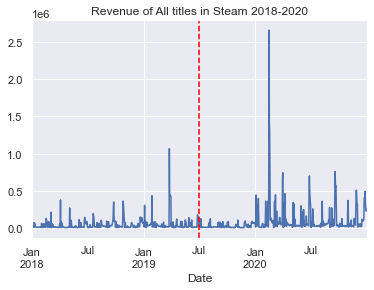

In [43]:
from matplotlib import pyplot as plt
#Add "Discount anti-rate" (share of original price)
df["Discount"] = df["Sale Price"]/df["Base Price"]

#CREATING PLOTS
#fig, axes = plt.subplots(nrows = 4, ncols = 2,)
#taking Numerical values for groupby
all_values = ["Gross Steam Sales (USD)","Net Steam Sales (USD)",'Net Units Sold','Base Price','Sale Price', 'Discount']
grouped = df[all_values].groupby(["Date"]).sum()
grouped["Average_Discount"] = grouped["Sale Price"]/grouped["Base Price"]
#grouped.reset_index(inplace = True)

#fig,ax = plt.subplots(1,2)
ax = grouped[all_values[0]].plot()
ax.axvline(pd.to_datetime('2019-07-01'),color="red",linestyle = "--")
ax.set_title("Revenue of All titles in Steam 2018-2020")
print(f'Grouped Index = {grouped.index}')
print(f'Grouped Shape = {grouped.shape}')
print(f'Grouped Head = {grouped.head}')


Text(0.5, 1.0, 'Revenue of New Releases in Steam 2018-2020')

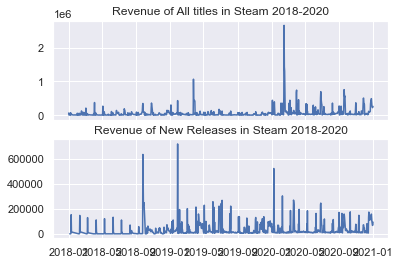

In [44]:
fig,axs = plt.subplots(nrows=2,ncols=1,sharex=True)
axs[0].plot(grouped[all_values[0]])
axs[1].plot(grouped_new_releases[all_values[0]])
axs[0].set_title("Revenue of All titles in Steam 2018-2020")
axs[1].set_title("Revenue of New Releases in Steam 2018-2020")
# axs[0].axvline(pd.to_datetime('2019-07-01'),color="red",linestyle = "--")
# axs[1].axvline(pd.to_datetime('2019-07-01'),color="red",linestyle = "--")

In [45]:
#top 10 performer days
print(grouped.nlargest(10,"Gross Steam Sales (USD)"))

            Gross Steam Sales (USD)  Net Steam Sales (USD)  Net Units Sold  \
Date                                                                         
2020-02-15             2.652866e+06           2.373480e+06          135483   
2020-02-16             1.431016e+06           1.244631e+06           80096   
2020-02-17             1.306421e+06           1.148416e+06           75433   
2019-03-26             1.067201e+06           9.044595e+05           30210   
2020-09-18             7.596619e+05           6.773210e+05          120884   
2020-03-31             7.450808e+05           6.519985e+05           69522   
2020-02-18             7.208363e+05           6.030140e+05           39677   
2020-06-26             7.011544e+05           6.241705e+05           83586   
2020-03-30             6.749841e+05           6.153411e+05           45642   
2020-09-19             6.078362e+05           5.323548e+05           97549   

              Base Price  Sale Price     Discount  Average_Disc

In [46]:
split = grouped.shape[0]-31 #index split
split

1065

In [47]:
#Prophet
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

split = grouped.shape[0]-31 #index split without 1 month
train = grouped[:split].reset_index()[["Date", all_values[0]]] 
test = grouped[split:].reset_index()[["Date", all_values[0]]] 

columns = ['ds','y']
train.columns = columns
test.columns = columns

# PROPHET AND SEASONALITY
# m = Prophet()
#m = Prophet(growth = 'flat') #when there are strong seasonality patterns rather than trend changes
#m = Prophet(seasonality_mode='multiplicative') #when there are strong seasonality patterns rather than trend changes

m = Prophet(seasonality_mode='multiplicative',growth = 'flat')
m.add_seasonality('quarterly', period=91.25, fourier_order=3, mode='additive')
#m.add_seasonality('daily', period=7, fourier_order=3, mode='additive')
m.add_seasonality('custom_monthly', period=30.5, fourier_order=3, mode='additive')
# m.add_regressor('regressor', mode='additive')

m.fit(train)

future = m.make_future_dataframe(periods = 365, freq ='D')
forecast = m.predict(future)

#forecast = m.predict(pd.concat([train,test]))
#print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

# fig1 = m.plot(forecast)

# fig2 = m.plot_components(forecast)
print(forecast[['yhat','yhat_lower','yhat_upper']].tail(92).sum()/1000)
fig1 = plot_plotly(m, forecast)
fig2 = plot_components_plotly(m, forecast)

fig1.show()
fig2.show()

# #dyplot.prophet(m,forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


yhat           5615.595834
yhat_lower    -9671.310534
yhat_upper    20917.955347
dtype: float64


In [52]:
f = forecast[(forecast.ds>='2021-09-01')&(forecast.ds<'2021-12-01')][['ds','yhat','yhat_lower','yhat_upper']]
f0 = f.copy()
f.loc[(f.yhat<0),'yhat'] = 0 #Eliminate negative numbers for now
#f.loc[(f.yhat==0),'yhat'] = f['yhat'].mean()
september = f[(f.ds>'2021-09-01')&(f.ds<'2021-10-01')]
october = f[(f.ds>'2021-10-01')&(f.ds<'2021-11-01')]
november = f[(f.ds>'2021-11-01')&(f.ds<'2021-12-01')]
# for x in [september,october,november]:
#     #x.loc[(x.yhat<0)] = 0 #applies to full row!
#     x.loc[(x.yhat<0),'yhat'] = 0 #applies to column
print("Values in thousands!")
print("September Expected: {}".format(september.sum()/1000))
print("October Expected: {}".format(october.sum()/1000))
print("November Expected: {}".format(november.sum()/1000))
print("Total 3 months Expected: {}".format(f.yhat.sum()/1000))
print ("Total 3 months including negatives: {}".format(f0.yhat.sum()/1000))
print("Mean 3 months Expected: {}".format(f.yhat.mean()))




Values in thousands!
September Expected: yhat          2452.619622
yhat_lower   -2465.908198
yhat_upper    7196.682829
dtype: float64
October Expected: yhat           750.127604
yhat_lower   -4412.562768
yhat_upper    5594.070812
dtype: float64
November Expected: yhat          2512.974879
yhat_lower   -2291.666141
yhat_upper    7307.065383
dtype: float64
Total 3 months Expected: 5867.042837483531
Total 3 months including negatives: 5591.010386258486
Mean 3 months Expected: 64472.99821410472


In [49]:
f_actual = train[(train.ds>='2020-09-01')&(train.ds<'2020-12-01')][['ds','y']]

september = f_actual[(f_actual.ds>'2020-09-01')&(f_actual.ds<'2020-10-01')]
october = f_actual[(f_actual.ds>'2020-10-01')&(f_actual.ds<'2020-11-01')]
november = f_actual[(f_actual.ds>'2020-11-01')&(f_actual.ds<'2020-12-01')]
# for x in [september,october,november]:
#     #x.loc[(x.yhat<0)] = 0 #applies to full row!
#     x.loc[(x.yhat<0),'yhat'] = 0 #applies to column
print("Values in thousands!")
print("September Actual: {}".format(september.sum()/1000))
print("October Actual: {}".format(october.sum()/1000))
print("November Actual: {}".format(november.sum()/1000))
print("Total 3 months Actual: {}".format(f_actual.y.sum()/1000))
print("Mean 3 months Actual: {}".format(f_actual.y.mean()))


Values in thousands!
September Actual: y    4446.977395
dtype: float64
October Actual: y    1919.573855
dtype: float64
November Actual: y    3514.775208
dtype: float64
Total 3 months Actual: 9925.388834999998
Mean 3 months Actual: 109070.20697802195


In [191]:
help(plot_plotly)

Help on function plot_plotly in module prophet.plot:

plot_plotly(m, fcst, uncertainty=True, plot_cap=True, trend=False, changepoints=False, changepoints_threshold=0.01, xlabel='ds', ylabel='y', figsize=(900, 600))
    Plot the Prophet forecast with Plotly offline.
    
    Plotting in Jupyter Notebook requires initializing plotly.offline.init_notebook_mode():
    >>> import plotly.offline as py
    >>> py.init_notebook_mode()
    Then the figure can be displayed using plotly.offline.iplot(...):
    >>> fig = plot_plotly(m, fcst)
    >>> py.iplot(fig)
    see https://plot.ly/python/offline/ for details
    
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    trend: Optional boolean to plot trend
    changepoints: Optional boolean to plot changepoints
    changepoint

MAE:91284.010


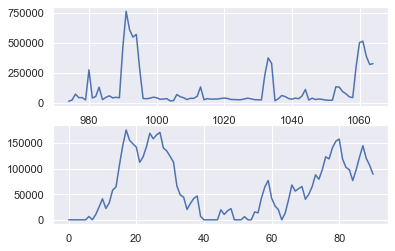

In [50]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

y_true = train[(train.ds>='2020-09-01')&(train.ds<'2020-12-01')][['y']] #same as f_actual above
y_pred = f[(f.ds>='2021-09-01')&(f.ds<'2021-12-01')][['yhat']].reset_index(drop = True) #same as f above
# y_pred = forecast[split:]['yhat'].reset_index(drop = True)
#print (y_pred)
mae = mean_absolute_error(y_true,y_pred)
print ('MAE:%.3f'%mae)
fig,axs = plt.subplots(2,1)
axs[0].plot(y_true,label = 'Actual')
axs[1].plot(y_pred,label = 'Predicted')

In [278]:
# f_actual.ds.reset_index(drop = True)
# f.reset_index(drop = True)

In [56]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

trace_pred = go.Scatter(
	    name = 'Predicted Sales',
	    mode = 'markers',
	    x = f.ds.reset_index(drop = True),
	    y = list(y_pred['yhat']), #yhat name of the forecast dataframe
	    marker=dict(
	        color='#FFBAD2',
	        line=dict(width=1)
	    ),
		#marker_color=data['Population'],
    	#text=data['State']) # hover text goes here
)
trace_true = go.Scatter(
	    name = 'Sales Actual',
	    mode = 'markers',
	    x = f_actual.ds.reset_index(drop = True),
	    y = list(y_true['y']), # y that is next to ds for Prophet model run
	    marker=dict(
	        color='#FFBAFF',
	        line=dict(width=4)
	    ),
		#marker_color=data['Population'],
    	#text=data['State']) # hover text goes here
)

fig.add_traces([trace_pred,trace_true])
fig.update_layout(title="Actual and Predicted Steam sales on one timeline for volume comparison.")
# fig2 = px.line(y_pred, title="Predicted Steam sales Sep - Nov 2021")
fig1 = px.line(y = y_true.y, x = f_actual.ds.reset_index(drop = True), title="Actual Steam sales Sep - Nov 2020")
fig2 = px.line(y = y_pred.yhat, x = f.ds.reset_index(drop = True), title="Predicted Steam sales Sep - Nov 2021")


# fig1.update_traces(texttemplate='%{text:.2s}', textposition='top center')
# fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.add_annotation(
#             text=(("September Actual: {} \n".format(september.sum()))+
# 				("October Actual: {} \n".format(october.sum()))+
# 				("November Actual: {}\n".format(november.sum()))+
# 				("Total 3 months Actual: {}\n".format(f_actual.y.sum()))+
# 				("Mean 3 months Actual: {}".format(f_actual.y.mean()))),
#             showarrow=True,
#             arrowhead=1)

# fig.add_annotation(
#     xref="x domain",
#     yref="y domain",
#     x=0.25,
#     y=0.4,
#     text=(("September Actual: {} \n".format(september.sum()))+
# 			("October Actual: {} \n".format(october.sum()))+
# 			("November Actual: {}\n".format(november.sum()))+
# 			("Total 3 months Actual: {}\n".format(f_actual.y.sum()))+
# 			("Mean 3 months Actual: {}".format(f_actual.y.mean()))),
#     # If axref is exactly the same as xref, then the text's position is
#     # absolute and specified in the same coordinates as xref.
#     axref="x domain",
#     # The same is the case for yref and ayref, but here the coordinates are data
#     # coordinates
#     ayref="y",
#     ax=0.5,
#     ay=2,
#     arrowhead=2,
# )

fig1.show()
fig2.show()
fig.show()
print(fig)


Figure({
    'data': [{'marker': {'color': '#FFBAD2', 'line': {'width': 1}},
              'mode': 'markers',
              'name': 'Predicted Sales',
              'type': 'scatter',
              'x': [2021-09-01 00:00:00, 2021-09-02 00:00:00, 2021-09-03 00:00:00,
                    2021-09-04 00:00:00, 2021-09-05 00:00:00, 2021-09-06 00:00:00,
                    2021-09-07 00:00:00, 2021-09-08 00:00:00, 2021-09-09 00:00:00,
                    2021-09-10 00:00:00, 2021-09-11 00:00:00, 2021-09-12 00:00:00,
                    2021-09-13 00:00:00, 2021-09-14 00:00:00, 2021-09-15 00:00:00,
                    2021-09-16 00:00:00, 2021-09-17 00:00:00, 2021-09-18 00:00:00,
                    2021-09-19 00:00:00, 2021-09-20 00:00:00, 2021-09-21 00:00:00,
                    2021-09-22 00:00:00, 2021-09-23 00:00:00, 2021-09-24 00:00:00,
                    2021-09-25 00:00:00, 2021-09-26 00:00:00, 2021-09-27 00:00:00,
                    2021-09-28 00:00:00, 2021-09-29 00:00:00, 2021-09

In [232]:
f

,ds,yhat,yhat_lower,yhat_upper
1340,2021-09-02,0.000000,-199458.407461,128863.463161
1341,2021-09-03,0.000000,-190632.305135,148223.993556
1342,2021-09-04,0.000000,-168293.032890,164858.927301
1343,2021-09-05,0.000000,-181964.247045,144644.079996
1344,2021-09-06,0.000000,-156799.292052,158076.284377
...,...,...,...,...
1425,2021-11-26,122425.081844,-39140.229224,291631.635447
1426,2021-11-27,144894.877601,-29265.404705,304162.070456
1427,2021-11-28,120026.883514,-49075.633683,281879.694086
1428,2021-11-29,106660.508611,-69331.137166,266434.422000


In [55]:
y_pred['yhat'].describe()

count        91.000000
mean      64472.998214
std       56254.265597
min           0.000000
25%       11541.015463
50%       49849.480484
75%      115713.383414
max      175672.255110
Name: yhat, dtype: float64

In [54]:
y_true['y'].mean()

109070.20697802195

In [ ]:
def plot_mean_sr(sr_list, time_sr, title, y_title, x_title):
    '''Plot a list of series using its mean, with error bar using std'''
    mean_sr, std_sr = util.calc_srs_mean_std(sr_list)
    max_sr = mean_sr + std_sr
    min_sr = mean_sr - std_sr
    max_y = max_sr.tolist()
    min_y = min_sr.tolist()
    x = time_sr.tolist()
    color = get_palette(1)[0]
    main_trace = go.Scatter(
        x=x, y=mean_sr, mode='lines', showlegend=False,
        line={'color': color, 'width': 1},
    )
    envelope_trace = go.Scatter(
        x=x + x[::-1], y=max_y + min_y[::-1], showlegend=False,
        line={'color': 'rgba(0, 0, 0, 0)'},
        fill='tozerox', fillcolor=lower_opacity(color, 0.2),
    )
    data = [main_trace, envelope_trace]
    layout = create_layout(title=title, y_title=y_title, x_title=x_title)
    fig = go.Figure(data, layout)
    return fig 

In [28]:
# plotting the time series data
# Finding top outliers!
df = pd.concat([train,test])
df.reset_index(inplace = True)
#df.plot(x='ds', y='y', figsize=(20, 5), title='Time series Data')
benchmark = 400000
outliers_1 = df[df.y>benchmark]['ds']
top_10_x = df.sort_values(by = 'y',ascending = False)['ds'][:10]
top_10_y = df.sort_values(by = 'y',ascending = False)['y'][:10]


In [29]:
print (forecast.columns)

NameError: name 'forecaest' is not defined

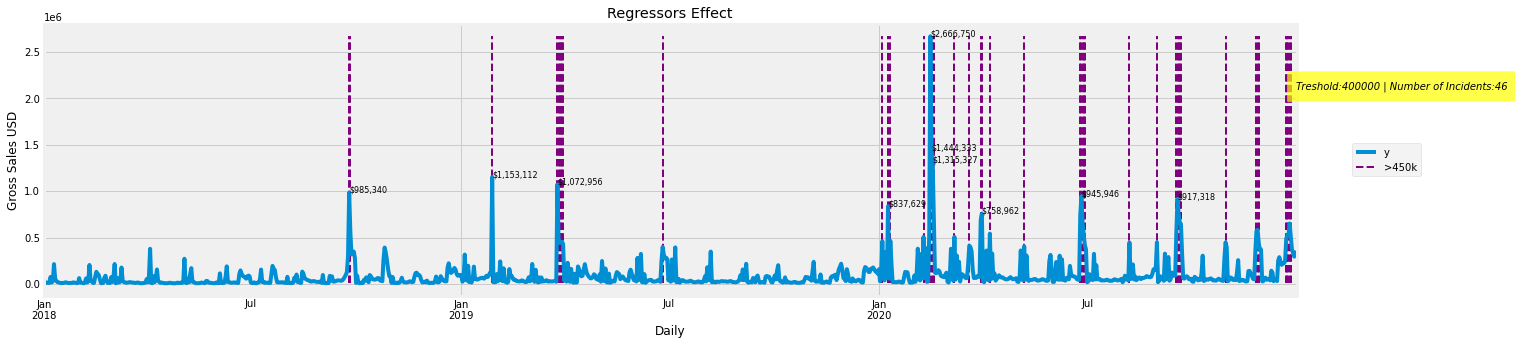

In [ ]:
# plotting the regressors
import matplotlib.dates as dates
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline


#New Plotly Graph - seenable data points
figure = go.Figure()
trace0 = go.Scatter(
    name = 'Actual Sales',
    mode = 'markers+lines',
    x = list(df['ds']),
    y = list(df['y']),
    marker=dict(
        color='blue',
        line=dict(width=1)
    )
)
trace1 = go.Scatter(
    name = 'Predicted Sales',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=1)
    )
)
data = [trace0,trace1]
layout = dict(title = 'Forecast',
    xaxis = dict(title = 'Dates',ticklen = 2,zeroline = True,showgrid = True), width = 1400, height = 400)

#fig = dict(data = data,layout = layout) # with import plotly.io as pio -> pio.show(fig) #or
figure = go.Figure(data = data, layout = layout)
figure.show()

                #Matplotlib 
ax = df.plot(x='ds', y='y', figsize=(20, 5), title='Regressors Effect')
plt.xlabel('Daily')
plt.ylabel('Gross Sales USD')
ticks, _ = plt.xticks()
y_min = df.y.min()
y_max = df.y.max()

plt.vlines(x=list(outliers_1), ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='>450k')

# plt.vlines(x=list(top_10_x), ymin=y_min, ymax=y_max, colors='green', ls=':', lw=2, label='Top 10')_
#USE IT AS A PROXY FOR Promotion start
# plt.vlines(x=list(df[df['regr1'] == 1]['date'].values), ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='regr1')
# plt.vlines(x=list(df[df['regr2'] == 1]['date'].values), ymin=y_min, ymax=y_max, colors='green', ls=':', lw=2, label='regr2')
plt.figtext(0.95, 0.7,"Treshold:{} | Number of Incidents:{}".format(benchmark,outliers_1.count()),style='italic',
            bbox={'facecolor': 'yellow', 'alpha': 0.7, 'pad': 10})
#plt.annotate('annotate', xy:())
for i,txt in enumerate(top_10_y):
    plt.annotate("${:,.0f}".format(abs(txt)),(list(top_10_x)[i],list(top_10_y)[i]),fontsize = 8)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.style.use('fivethirtyeight')
plt.show()

#pio.show(fig)

In [ ]:
# df['regr1'] =  df['ds'].apply(lambda x: 1 for x in outliers_1) 
# df.assign(regr1 = lambda x: 1 if x['ds'].isin(outliers_1))

# df_outliers_1 = df.copy()[df.ds.isin(outliers_1)]
# df_outliers_1['regr1'] = 1
# df_outliers_1

index_outliers_1 = df[df.ds.isin(outliers_1)].index
df.loc[index_outliers_1,'regr1'] = 1    




In [ ]:
import json
from prophet.serialize import model_to_json, model_from_json
with open('serialized_model.json','w') as fout:
    json.dump(model_to_json(m),fout) #save model
with open('serialized_model.json','r') as fin:
    m = model_from_json(json.load(fin)) #load model

In [ ]:
#split into input (X) and output (Y) variables
# split = 500 #index split
# #grouped.reset_index(inplace = True)
# train = grouped[:split].reset_index()
# test = grouped[split:].reset_index()
# print (train.columns)

# #"Gross Steam Sales (USD)"

# train_array = train[["Date", all_values[0]]] 
# train_array["Date"] = pd.to_datetime(train_array["Date"])
# train_array.set_index("Date", inplace = True)
# train_array = np.array(train_array)
# print (type(train_array))
# # print (train_array.shape)
# # print (train_array.head())

# test_array = test[["Date", all_values[0]]]
# test_array["Date"] = pd.to_datetime(test_array["Date"])
# test_array.set_index("Date", inplace = True)
# test_array = np.array(test_array)
# print (test_array.shape)
# print (test_array.head())

# # import the lib to load / Save the model
# import joblib
# import sklearn  
# #X_train, X_test, Y_train, Y_test  = sklearn.model_selection.train_test_split(df)
# from sklearn.naive_bayes import GaussianNB
# # create Gaussian Naive Bayes model object and train it with the data
# nb_model = GaussianNB()

# print(test_array.ravel())

# nb_model.fit(train_array, test_array)

# # predict values using the training data
# nb_predict_train = nb_model.predict(train_array)

# # import the performance metrics library
# from sklearn import metrics

# # Accuracy
# print("Accuracy: {0:.4f}".format(metrics.accuracy_score(test_array, nb_predict_train)))
# print()

# # Save the model
# joblib.dump(nb_model, "trained-model.pkl")

# # Then, i'm loading the model and try to make predictions on a new dataset :

# # import the lib to load / Save the model
# import joblib  

# import numpy as np 

# # Load the model
# nb_predict_train = joblib.load("trained-model.pkl")

# # load the test dataset
# df_predict = np.loadtxt("modiftest.csv", delimiter=";")

# X_train = df_predict

# nb_predict_train.predict(X_train)

# print(X_train)



C:\Users\o.georgievskiy\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

C:\Users\o.georgievskiy\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

C:\Users\o.georgievskiy\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.



ValueError: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.

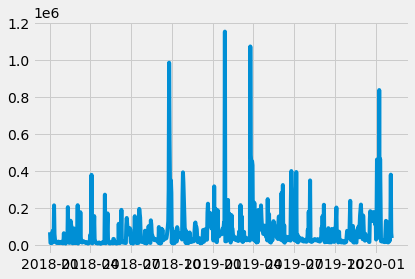

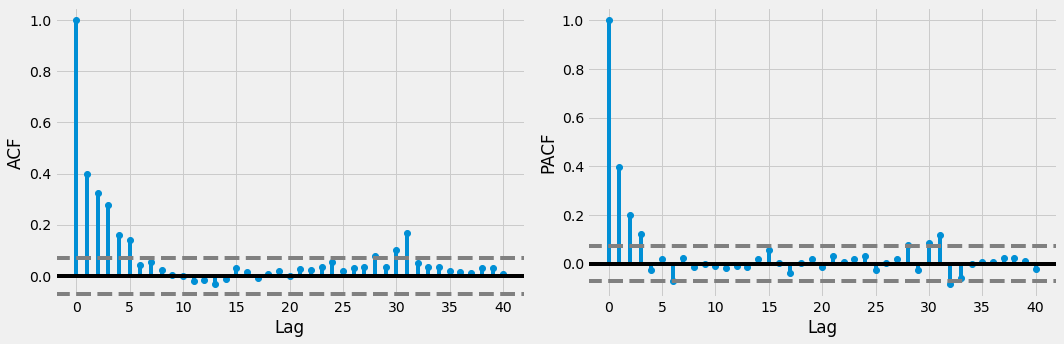

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# dateparse = lambda dates: pd.datetime.strptime[dates,"%Y-%m"]
# train_array = train[all_values[0]]
# test_array = train[all_values[0]]
series = grouped[all_values[0]]
percent_training = 0.70
split_point = round(len(series)*percent_training)
training, testing = series[0:split_point],series[split_point:]

# training = np.log(training)
plt.plot(training)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training)
lag_pacf = pacf(training)
#plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

#ARIMA ACF look p=3, PACF look q=6 . For season big value on ACF S =?1 (if it was positive, then positive P=1 and Q=0). If seasonal pattern is not stable over time then set D = 0. SARIMA(3,0,6)(1,0,0)[?1]
model = SARIMAX(training, order = [3,0,2], seasonal_order = (1,0,0,0), enforce_stationarity = True, enforce_invertibility = False)
model_fit = model.fit(disp=False) #extract the fitted model

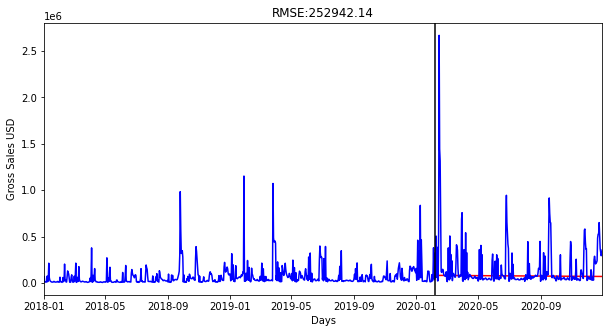

In [ ]:
K = len(testing)
forecast = model_fit.forecast(K)
#forecast = np.exp(forecast) #if we had differencing to transform back to original scale

#plot forecast and rmse
plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('RMSE:%.2f'%np.sqrt(sum((forecast-testing)**2)/len(testing)))
plt.xlabel("Days")
plt.ylabel("Gross Sales USD")
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=series.index[split_point],color = 'black') #line to divive training and testing data


In [ ]:
series = grouped[all_values[0]]
percent_training = 0.70
split_point = round(len(series)*percent_training)
training, testing = series[0:split_point],series[split_point:]
print (series.index)
print (training.index)
print (testing.index)
print (series)


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12'],
              dtype='datetime64[ns]', name='Date', length=255, freq=None)
DatetimeIndex(['2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
 

In [ ]:

series = grouped[all_values[0]]
#series.index = pd.DatetimeIndex(series.index).to_timestamp()
series = series[(series.values<500000)]
#df.index = pd.DatetimeIndex(df.index).to_period('M')
D1 = {}
D1[""] = {"Best_score":"","Best_config":""}

#series = train[all_values[0]]
for i in [0.4,0.5,0.6,0.7,0.8,0.9]:
    percent_training = i
    print(i)
    split_point = round(len(series)*percent_training)
    training, testing = series[0:split_point],series[split_point:]
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
    p_val=3
    q_val=3
    d_vals=0
    pdq_vals=[(p,d,q) for p in range(p_val) for d in range(d_vals) for q in range(q_val)]
    best_score, best_cfg = float("inf"), None
    for (p,d,q) in pdq_vals:
        model = SARIMAX(training, order = [p,d,q], seasonal_order = (0,0,0,0), enforce_stationarity = True, enforce_invertibility = False)
        model_fit = model.fit(disp=False) #extract the fitted model
        K = len(testing)
        forecast = model_fit.forecast(K)
        order = (p,d,q)
        #axs[p,q].plot(data = [forecast,series],color = ['r','b'])
        axs[p,q].axvline(x=series.iloc[split_point],color = 'black') #line to divive training and testing data
        axs[p,q].plot(forecast,'r')
        axs[p,q].plot(series,'b')
        axs[p,q].set_title('i: {}, pdq{}{}{} .RMSE:%.2f'.format(i,p,d,q)%np.sqrt(sum((forecast-testing)**2)/len(testing)))
        axs[p,q].autoscale(enable=True,axis='x',tight=True)
    
        mse = np.sqrt(sum((forecast-testing)**2)/len(testing))
        if mse<best_score:
            best_score = mse
            best_cfg = order
            print('ARIMA%s MSE=%.3f' % (order,mse))
            D1[i] = {"Best_score":best_score, "Best_config": best_cfg}
        # if mse < best_score:
        #     best_score, best_cfg = mse, order
        #     print('ARIMA%s MSE=%.3f' % (order,mse))
        # plt.plot(forecast,'r')
        # plt.plot(series,'b')
        # plt.title('.RMSE:%.2f'%np.sqrt(sum((forecast-testing)**2)/len(testing)))
        # plt.xlabel("Days")
        # plt.ylabel("Gross Sales USD")
        # plt.autoscale(enable=True,axis='x',tight=True)
        # plt.set_title("{}{}".format(p,q))
        # plt.axvline(x=series.index[split_point],color = 'black') #line to divive training and testing data
        #plt.set_title("p,q,d = ", p,q,d)
        #axs[p,q].axvline(x=series.index[split_point],color = 'black') #line to divive training and testing data
print ("Check")
print (D1)
# #print ("Best finally: i{} score{} pdq{}".format(i, best_score, best_cfg))
# model = SARIMAX(training, order = best_cfg, seasonal_order = (0,0,0,0), enforce_stationarity = True, enforce_invertibility = False)
# model_fit = model.fit(disp=False) #extract the fitted model
# K = len(testing)
# forecast = model_fit.forecast(K)
# plt.plot(forecast,'r')
# plt.plot(series,'b')
# plt.title('{}{}{}.RMSE:%.2f'.format(p,d,q)%np.sqrt(sum((forecast-testing)**2)/len(testing)))
# plt.xlabel("Days")
# plt.ylabel("Gross Sales USD")
# plt.autoscale(enable=True,axis='x',tight=True)
# plt.set_title("{}{}{}".format(p,d,q))
# plt.axvline(x=series.index[split_point],color = 'black') #line to divive training and testing data
# plt.tight_layout()
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


 with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\o.georgievskiy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\o.georgievskiy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\o.georgievskiy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.war

KeyboardInterrupt: 

In [ ]:
for i in [0.4,0.5,0.6,0.7,0.8,0.9]:
    percent_training = i
    print(i)

0.4
0.5
0.6
0.7
0.8
0.9


In [ ]:
# 2,0,3 RMSE = 67986.35
# 3,0,0 rmse 66378.53
# 3,0,3 RMSE = 67945.67
# 4,0,0 rMSE = 66031.85
# others >

In [ ]:
# def objfunc(order, exog, endog):
#     from statsmodels.tsa.arima_model import ARIMA
#     fit = ARIMA(endog, order, exog).fit()
#     return fit.aic()

# from scipy.optimize import brute
# grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))
# brute(objfunc, grid, args=(exog, endog), finish=None)

NameError: name 'exog' is not defined

In [ ]:
series = train[all_values[0]]

evaluate_models()


def evaluate_arima_model(X, arima_order, i):
    # prepare training dataset
    train_size = int(len(X) * float(i))
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = np.sqrt(sum((pedictions-test)**2)/len(test)
    return error
    # calculate out of sample error
    # error = mean_squared_error(test, predictions)
    # return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    series = series.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))

                    plt.plot(forecast,'r')
                    plt.plot(series,'b')
                    plt.title('pqd-{} i-{}.RMSE:%.2f'.format(order,i)%np.sqrt(sum((forecast-testing)**2)/len(testing)))
                    plt.xlabel("Days")
                    plt.ylabel("Gross Sales USD")
                    plt.autoscale(enable=True,axis='x',tight=True)
                    plt.axvline(x=series.index[split_point],color = 'black') #line to divive training and testing data

                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

SyntaxError: invalid syntax (Temp/ipykernel_21436/1217298304.py, line 17)

In [ ]:
import statsmodels 
from statsmodels import api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.utils import check_array
from functools import partial
from multiprocessing import Pool

series = train[all_values[0]]
percent_training = 0.4
split_point = round(len(series)*percent_training)
training, testing = series[0:split_point],series[split_point:]

def get_aic_bic(order,series):
    aic=np.nan
    bic=np.nan
    #print(series.shape,order)
    try:
        arima_mod=statsmodels.tsa.arima_model.ARIMA(series,order=order,freq='D').fit(transparams=True,method='css')
        aic=arima_mod.aic
        bic=arima_mod.bic
        print(order,aic,bic)
    except:
        pass
    return aic,bic

def get_PDQ_parallel(data,n_jobs=7):
    p_val=13
    q_val=13
    d_vals=2
    pdq_vals=[ (p,d,q) for p in range(p_val) for d in range(d_vals) for q in range(q_val)]
    get_aic_bic_partial=partial(get_aic_bic,series=data)
    p = Pool(n_jobs)
    res=p.map(get_aic_bic_partial, pdq_vals)  
    p.close()
    return pd.DataFrame(res,index=pdq_vals,columns=['aic','bic']) 



0.4


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

# Load/split your data
grouped = df[all_values].groupby(["Date"]).sum()
print (grouped.index)
#grouped.index.freq = 'w'
series = grouped[all_values[0]]
#series.reset_index(inplace = True)
#test_array = test["Date", all_values[0]]
# series["Date"] = pd.to_datetime(series["Date"])
# series.set_index("Date", inplace = True)
print (series.shape)
print (series.head())


y = series
print (y.index, y.values)
train, test = train_test_split(y, train_size=1000)

# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

# Serialize your model just like you would in scikit:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)
    
# Load it and make predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    print(mod.predict(15))

ModuleNotFoundError: No module named 'pmdarima'